<center><h1>Ma_Htet_HW1</h1></center>
<br>
Name: Htet Ma
<br>
Github Username: hswma 
<br>
USC ID: 4522446617
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('../data/vertebral_column_data')

Get the Vertebral Column Data Set

In [2]:
c2 = arff.loadarff('column_2C_weka.arff')
dfc2 = pd.DataFrame(c2[0])
dfc2.loc[dfc2['class'] == b'Abnormal', 'class'] = 1
dfc2.loc[dfc2['class'] == b'Normal' , 'class'] = 0
dfc2

# Reference
# Import dat: https://stackoverflow.com/questions/50628861/dat-file-import-in-pandas
# Import arff: https://stackoverflow.com/questions/33623760/fail-to-load-arff-file-in-python
# Replace cell: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

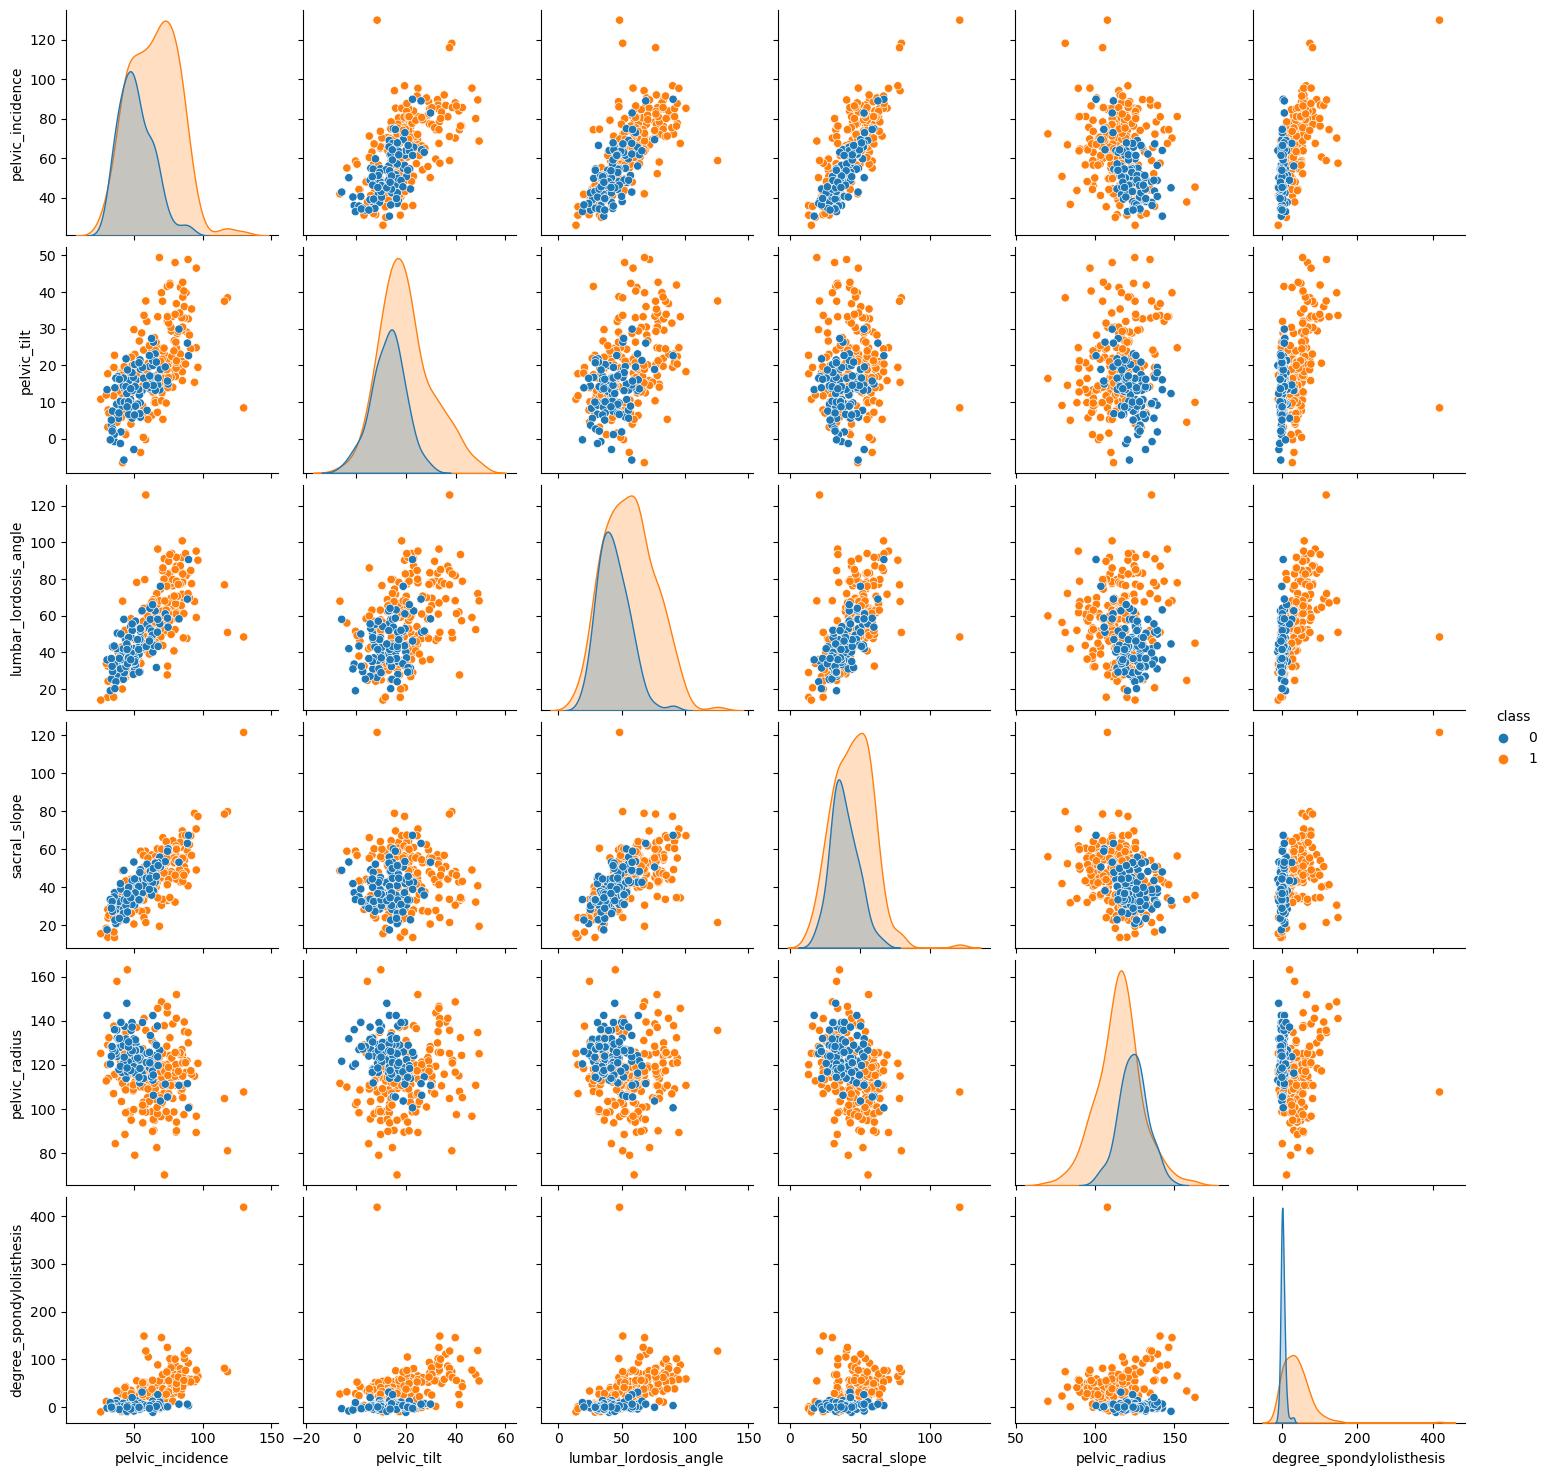

In [3]:
sns.pairplot(dfc2, hue='class')
plt.show()

# Reference
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

#### ii. Boxplots

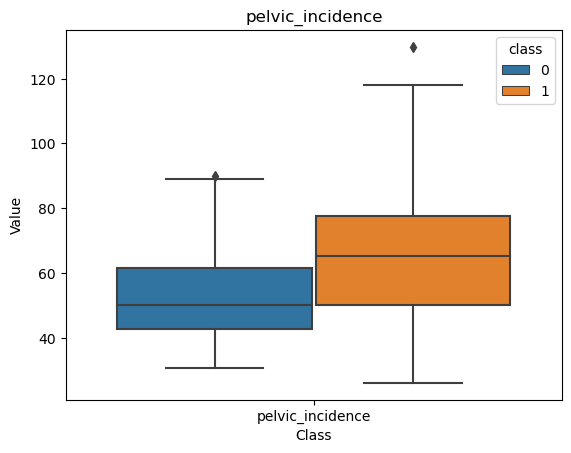

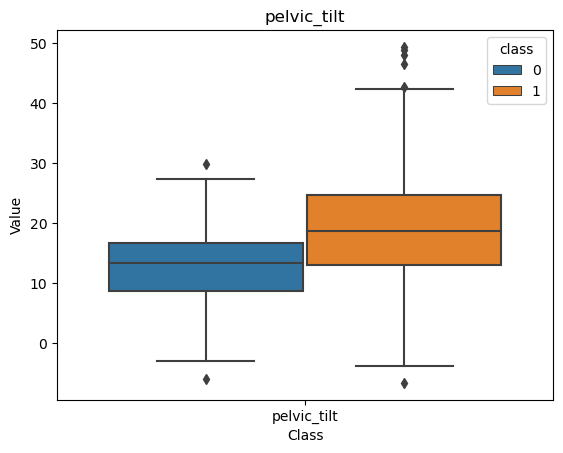

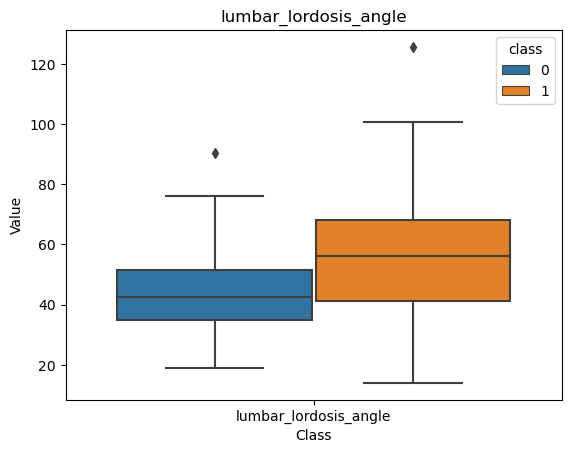

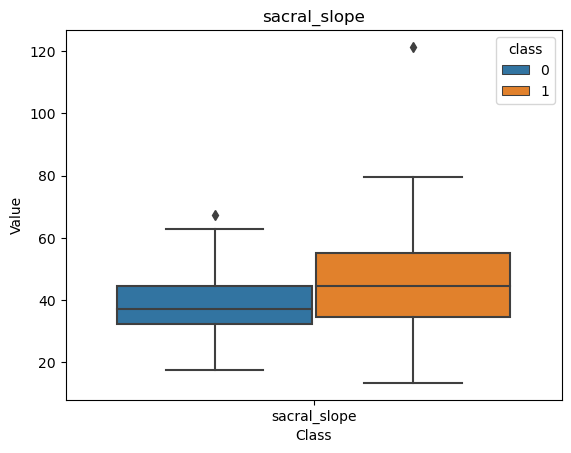

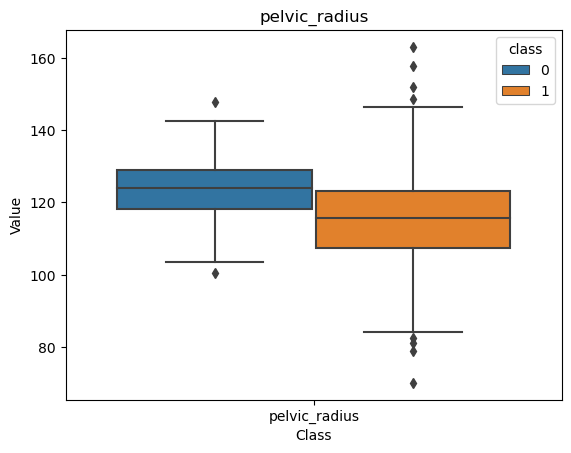

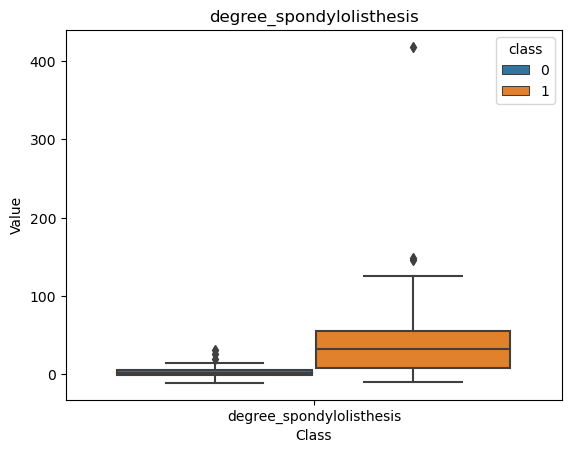

In [4]:
dfc2_long = pd.melt(dfc2, id_vars=['class'], value_vars=dfc2.columns)

variable_names = dfc2_long['variable'].unique()

for var_name in variable_names:
    bp_pi = dfc2_long[dfc2_long['variable'] == var_name]
    sns.boxplot(x='variable', y='value', hue='class', data=bp_pi)
    plt.xlabel('Class')
    plt.ylabel('Value')
    plt.title(var_name)
    plt.show()


# sns.boxplot(x='variable', y='value', hue='class', data=dfc2_long)
# plt.xticks(rotation=90)

# Reference
# Melt: https://stackoverflow.com/questions/25284859/grouping-boxplots-in-seaborn-when-input-is-a-dataframe
# Boxplot: https://seaborn.pydata.org/examples/grouped_boxplot.html

#### iii. Split Data Set

In [5]:
# first 70 rows of Class 0
df0 = dfc2.loc[dfc2['class'] == 0]
dfc0 = df0.iloc[0:70,:]

# first 140 rows of Class 1
df1 = dfc2.loc[dfc2['class'] == 1]
dfc1= df1.iloc[0:140,:]

# Training data
dftrain = pd.concat([dfc1, dfc0])
print(dftrain)

# Test data
dftest = pd.concat([df1.iloc[140:,:],df0.iloc[70:,:]])
print(dftest)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
275         67.289712    16.717514              51.000000     50.572198   
276         51.325464    13.631223              33.258578     37.694240   
277         65.756348    13.206926              44.000000     52.549422   
278         40.413366    -1.329412              30.982768     41.742778   
279         48.801909    18.017762              52.000000     30.784147   

     pelvic_radius  degree_spondylolisthesis class  
0        98.672917                 -0.254400  

### (c) Classification

#### i. Euclidean Metric

In [6]:
# Reference: https://towardsdatascience.com/machine-learning-basics-k-nearest-neighbors-classification-6c1e0b209542
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

x_train = dftrain.iloc[:,0:6].values
y_train = dftrain.iloc[:,6].values
classifier.fit(x_train, y_train.astype('int'))

KNeighborsClassifier(n_neighbors=10)

#### ii. Test Data

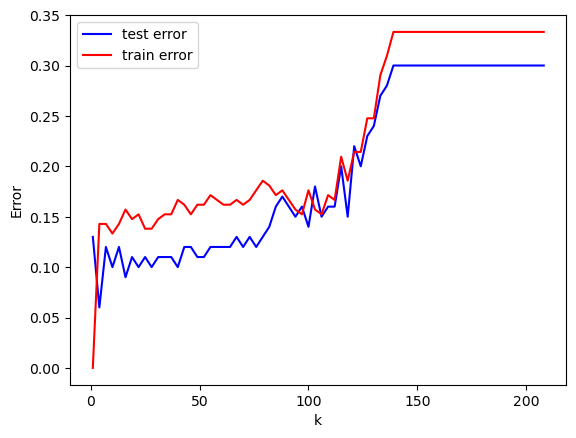

Most suitable k is 4


In [7]:
karry = np.arange(208,0,-3)
train_err = 1 - classifier.score(x_train,y_train.astype('int'))

x_test = dftest.iloc[:,0:6].values
y_test = dftest.iloc[:,6].values
test_err = 1 - classifier.score(x_test,y_test.astype('int'))

test_err2 = []
train_err2 = []
for k in karry:
    classifer_2 = KNeighborsClassifier(n_neighbors = k)
    classifer_2.fit(x_train, y_train.astype('int'))
    train_err2.append(1 - classifer_2.score(x_train,y_train.astype('int')))
    test_err2.append(1 - classifer_2.score(x_test,y_test.astype('int')))


plt.plot(karry, test_err2,'b-', label = 'test error')
plt.plot(karry, train_err2, 'r-', label = 'train error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

minpos = np.argmin(test_err2)
print(f'Most suitable k is {karry[minpos]}')

In [8]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype('int'), y_pred)
print(f'The confusion matrix is', cm)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test.astype('int'), y_pred))

FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN = cm[0,0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(f'True positive rate is {TPR}')
print(f'True negative rate is {TNR}')
# print(f'Precision is {PPV}')

from sklearn.metrics import precision_score
PPV = precision_score(y_test.astype('int'), y_pred)
print(f'Precision is {PPV}')

from sklearn.metrics import f1_score
a = f1_score(y_test.astype('int'), y_pred)
print(f'F1 score is {a}')

# Reference: https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
# Reference: https://hub.packtpub.com/k-nearest-neighbors/

The confusion matrix is [[20 10]
 [ 0 70]]
Accuracy :  0.9
True positive rate is 1.0
True negative rate is 0.6666666666666666
Precision is 0.875
F1 score is 0.9333333333333333


#### iii. Learning Curve

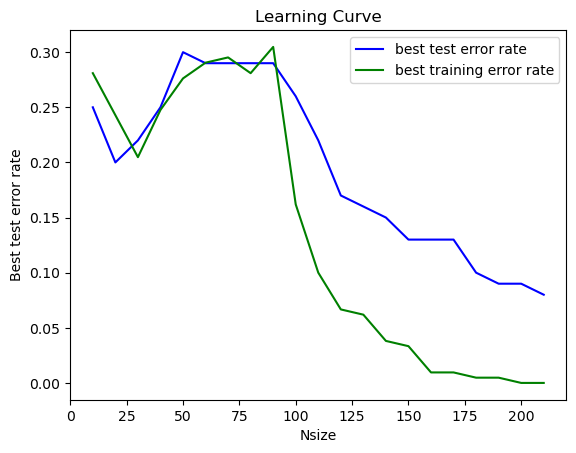

In [9]:
Nsize = np.arange(10,220,10)

besterr = []
besterrtrain = []
for N in Nsize:
    trainc0 = df0.iloc[0:N//3,:]
    trainc1 = df1.iloc[0:N-(N//3),:]
    trainiii = pd.concat([trainc0,trainc1])
    xiii = trainiii.iloc[:,0:6].values
    yiii = trainiii.iloc[:,6].values
    kiii = np.arange(1,N,5)
    testerriii = []
    traineriii = []
    for K in kiii:
        classiferiii = KNeighborsClassifier(n_neighbors = K)
        classiferiii.fit(xiii, yiii.astype('int'))
        testerriii.append(1 - classiferiii.score(x_test,y_test.astype('int')))
        traineriii.append(1 - classiferiii.score(x_train,y_train.astype('int')))
    besterr.append(min(testerriii))
    besterrtrain.append(min(traineriii))
    
plt.plot(Nsize, besterr,'b-', label = 'best test error rate')
plt.plot(Nsize, besterrtrain, 'g-', label='best training error rate')
plt.xlabel('Nsize')
plt.ylabel('Best test error rate')
plt.legend()
plt.title('Learning Curve')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

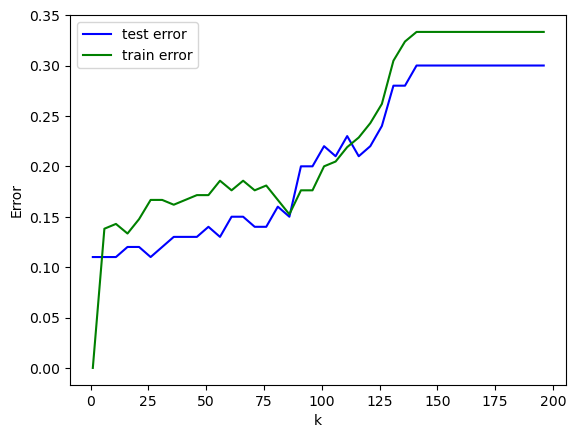

K values with loweset error are [ 1  6 11 26]
Most suitable k is 6


In [10]:
kdd = np.arange(1,201,5)

testdi = []
traindi = []
for kd in kdd:
    classiferdi = KNeighborsClassifier(n_neighbors=kd, metric='minkowski', p=1, weights='uniform', algorithm='brute')
    classiferdi.fit(x_train, y_train.astype('int'))
    testdi.append(1 - classiferdi.score(x_test,y_test.astype('int')))
    traindi.append(1 - classiferdi.score(x_train,y_train.astype('int')))
# test to calculate the error manual (the line above)
plt.plot(kdd, testdi,'b-', label = 'test error')
plt.plot(kdd, traindi, 'g-', label='train error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

min_err_dia = min(testdi)
ind_min_dia = [dia for dia, v in enumerate(testdi) if v == min_err_dia]
kmin_dia = kdd[ind_min_dia]
print(f'K values with loweset error are {kmin_dia}')
bestk_dia = min(vdia for vdia in kmin_dia if vdia >1)
print(f'Most suitable k is {bestk_dia}')

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

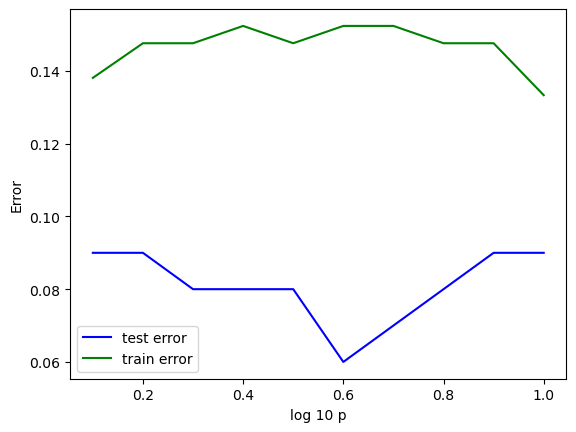

Best log 10 p is 0.60


In [11]:
dibp = np.arange(0.1,1.1,0.1)
ppara = pow(10,dibp)

testdib = []
traindib = []
for pp in ppara:
    classiferdib = KNeighborsClassifier(n_neighbors=6, p=pp)
    classiferdib.fit(x_train, y_train.astype('int'))
    testdib.append(1 - classiferdib.score(x_test,y_test.astype('int')))
    traindib.append(1 - classiferdib.score(x_train,y_train.astype('int')))

plt.plot(dibp, testdib,'b-', label = 'test error')
plt.plot(dibp, traindib, 'g-', label='train error')
plt.xlabel('log 10 p')
plt.ylabel('Error')
plt.legend()
plt.show()

mindibp = np.argmin(testdib)
print(f'Best log 10 p is {dibp[mindibp]:.2f}')

##### C. Chebyshev Distance With p -> infinity.

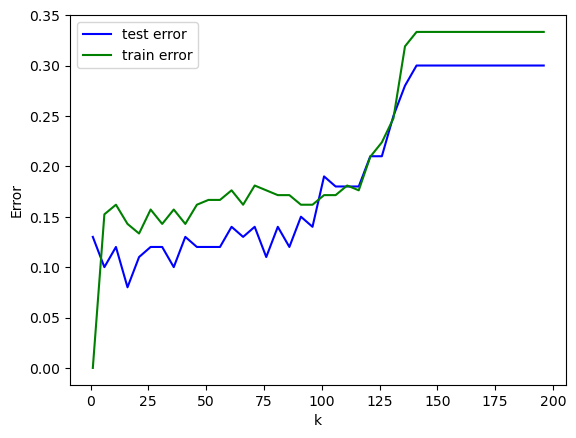

K values with loweset error are [16]
Most suitable k is 16


In [12]:
kdd = np.arange(1,201,5)

testdic = []
traindic = []
for kd in kdd:
    classiferdic = KNeighborsClassifier(n_neighbors=kd, metric='chebyshev',p=float('inf'))
    classiferdic.fit(x_train, y_train.astype('int'))
    testdic.append(1 - classiferdic.score(x_test,y_test.astype('int')))
    traindic.append(1 - classiferdic.score(x_train,y_train.astype('int')))

plt.plot(kdd, testdic,'b-', label = 'test error')
plt.plot(kdd, traindic, 'g-', label='train error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

min_err_dic = min(testdic)
ind_min_dic = [dic for dic, v in enumerate(testdic) if v == min_err_dic]
kmin_dic = kdd[ind_min_dic]
print(f'K values with loweset error are {kmin_dic}')
bestk_dic = min(vdic for vdic in kmin_dic if vdic >1)
print(f'Most suitable k is {bestk_dic}')

#### ii. Mahalanobis Distance.

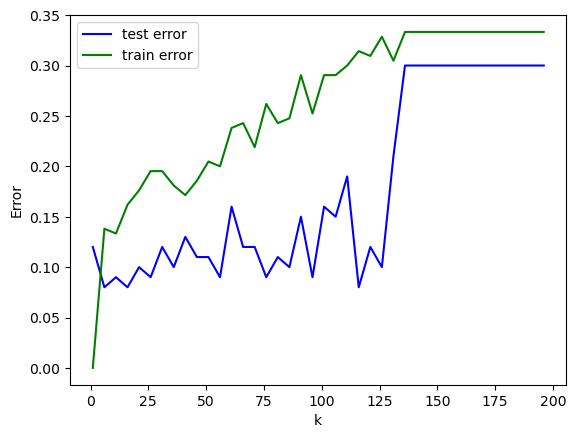

K values with loweset error are [  6  16 116]
Most suitable k is 6


In [13]:
kdii = np.arange(1,201,5)

testdii = []
traindii = []
for km in kdii:
    classiferdii = KNeighborsClassifier(n_neighbors=km, algorithm='brute', metric='mahalanobis', metric_params={'VI': np.cov(x_train, rowvar= False)})
    classiferdii.fit(x_train, y_train.astype('int'))
    testdii.append(1 - classiferdii.score(x_test,y_test.astype('int')))
    traindii.append(1 - classiferdii.score(x_train,y_train.astype('int')))

plt.plot(kdii, testdii,'b-', label = 'test error')
plt.plot(kdii, traindii, 'g-', label='train error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

min_err_dii = min(testdii)
ind_min_dii = [dii for dii, v in enumerate(testdii) if v == min_err_dii]
kmin_dii = kdii[ind_min_dii]
print(f'K values with loweset error are {kmin_dii}')
bestk_dii = min(vdii for vdii in kmin_dii if vdii >1)
print(f'Most suitable k is {bestk_dii}')

### (e) Weighted Decision

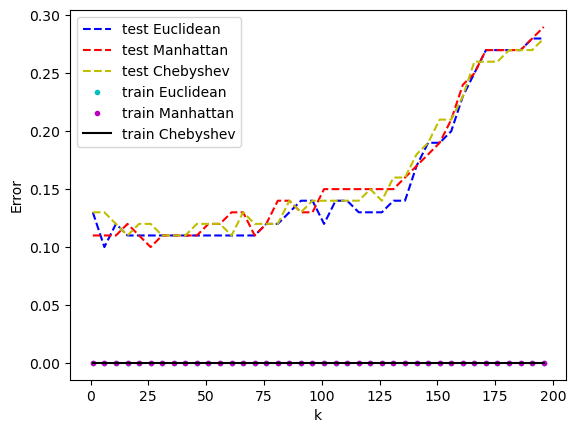

Euclidean best test error is 0.10000
Manhattan best test error is 0.10000
Chebyshev best test error is 0.11000


In [14]:
kke = np.arange(1,201,5)

testE = []
testM = []
testC = []
trainE = []
trainM = []
trainC = []
for ke in kke:
    classiferE = KNeighborsClassifier(n_neighbors=ke, metric='euclidean', p=2, weights='distance', algorithm='brute')
    classiferE.fit(x_train, y_train.astype('int'))
    testE.append(1 - classiferE.score(x_test,y_test.astype('int')))
    trainE.append(1 - classiferE.score(x_train,y_train.astype('int')))
    classiferM = KNeighborsClassifier(n_neighbors=ke, metric='manhattan', p=1, weights='distance', algorithm='brute')
    classiferM.fit(x_train, y_train.astype('int'))
    testM.append(1 - classiferM.score(x_test,y_test.astype('int')))
    trainM.append(1 - classiferM.score(x_train,y_train.astype('int')))
    classiferC = KNeighborsClassifier(n_neighbors=ke, metric='chebyshev', p=float('inf'), weights='distance', algorithm='brute')
    classiferC.fit(x_train, y_train.astype('int'))
    testC.append(1 - classiferC.score(x_test,y_test.astype('int')))
    trainC.append(1 - classiferC.score(x_train,y_train.astype('int')))

plt.plot(kke, testE,'b--', label = 'test Euclidean')
plt.plot(kke, testM,'r--', label = 'test Manhattan')
plt.plot(kke, testC,'y--', label = 'test Chebyshev')
plt.plot(kke, trainE,'c.', label = 'train Euclidean')
plt.plot(kke, trainM,'m.', label = 'train Manhattan')
plt.plot(kke, trainC,'k-', label = 'train Chebyshev')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

print(f'Euclidean best test error is {min(testE):.5f}')
print(f'Manhattan best test error is {min(testM):.5f}')
print(f'Chebyshev best test error is {min(testC):.5f}')

### (f) Training Error Rate

The lowest training error rate I achieved is 0.